# Table of Contents

- [Introduction](#intro)
- [Step 1: Install Libraries](#install)
- [Step 2: Gathering Data](#gatherdata)
- [Step 3: Assessing Data](#assessdata)
- [Step 4: Cleaning Data](#cleaningdata)
- [Step 5: Storing, Analysing, and Visualizing Data](#workwithdata)
- [Step 6: Machine Learning Model](#machinelearning)

<a id='intro'></a>
# Introduction
This project focuses on data wrangling and cleaning to fix quality and tidiness issues using python. The dataset that we are wrangling is the tweet archive of Twitter user `@dog_rates`, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people’s dogs with a humorous comment about the dog. These ratings generally have a denominator of 10, and the numerators almost always greater than 10. The tweet archive records using in this project contains basic tweet data (tweet ID, timestamp, text, etc.) for all 2356 of their tweets as they stood on August 1, 2017.

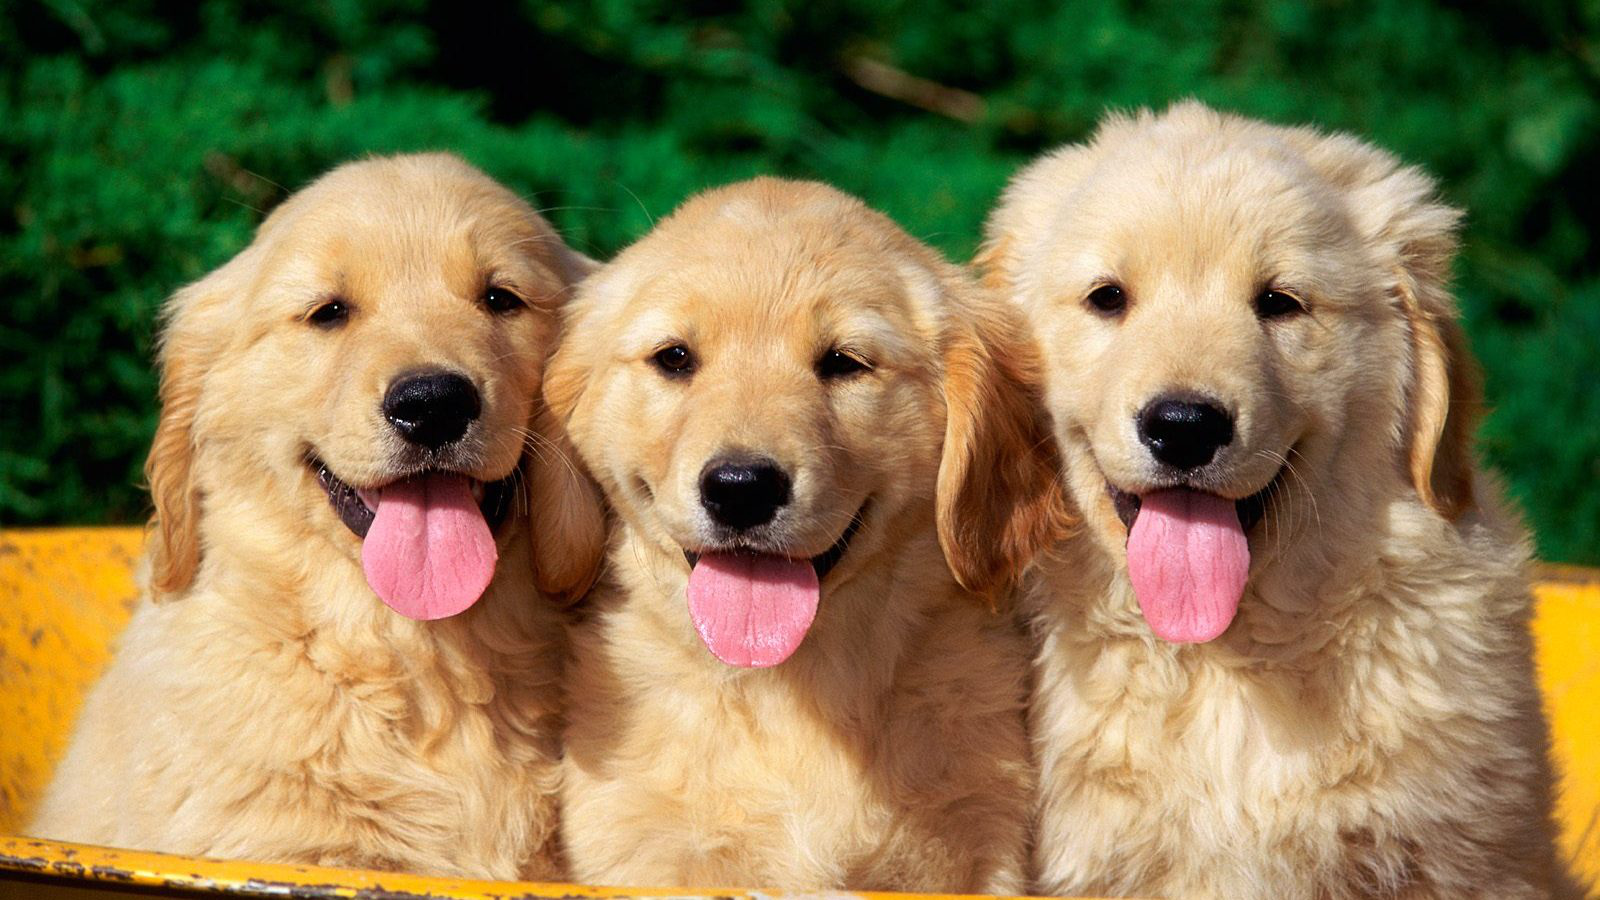

In [1]:
from PIL import Image # Library for importing images
Image.open('images/cute_dogs.jpg')

### Key Points
Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a id='install'></a>
## Step 1: Install Libraries

**The following packages (libraries) need to be installed:**
* pandas
* NumPy
* requests
* tweepy
* json

We used pip install to install the above libraries using the Anaconda Powershell Prompt

`pip install tweepy` \
`pip install requests`

The other modules are built-in so we don't need to install them here.

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import datetime
import os
import string

# Inline matplotlib
%matplotlib inline

<a id='gatherdata'></a>
## Step 2: Gathering Data

### 2.1. Gathering Data for this Project
We are going to gather each of the three pieces of data as described below in a Jupyter Notebook titled `wrangle_act.ipynb`:

**The WeRateDogs Twitter archive:**

We will manually download and save this file as: `twitter_archive_enhanced.csv`.

**URL:** https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv

**The tweet image predictions:**

We will programatically download and save this file as: `image_predictions.tsv` using the Requests library. 

**URL:** https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

**Query using the Twitter API:**

Query using the Twitter API to obtain each tweet's retweet count and favorite ("like") count at minimum, and any additional data we find interesting. We will save this file as: `tweet_json.txt`.

### 2.2. Twitter Archive

The WeRateDogs Twitter archive. We will manually save this file as: `twitter_archive_enhanced.csv`

**URL:** https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv

In [3]:
# Reading the twitter archive
twitter_archive_en = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_en.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2.3. Image Predictions

The tweet image predictions. We will programatically save this file as: `image_predictions.tsv` using the Requests library. 

**URL:** https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
# Create image_predictions directory using os
folder_name = 'image_predictions'

# Create a folder if one does not currently exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# Request data for image-predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
# Create a file in new directory
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
# Opening the predictions file
img_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 2.4. Twitter API

Query using the Twitter API to obtain each tweet's retweet count and favorite ("like") count at minimum, and any additional data we find interesting. We will save this file as: `tweet_json.txt`.

Below is the output generated from our status variable:

We saved the output as a file named: `tweet_json_status.txt`, then we query the data for `follower_count`, `retweet_count`, and `favourite_count`.

**8,940,884** Followers, **401** Retweets, **1045** Favourites

In [8]:
# Extract data from tweet_json.txt file
df_list = []
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweet in data:
        df_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count'],
                        'followers_count': tweet['user']['followers_count']})

In [9]:
# Create dataframe from json dictionaries
api_data = pd.DataFrame(df_list, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count', 
                                            'followers_count'])

In [10]:
api_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7435,35269,8940931
1,892177421306343426,5527,30524,8940931
2,891815181378084864,3649,22951,8940931
3,891689557279858688,7615,38555,8940931
4,891327558926688256,8195,36841,8940931
5,891087950875897856,2750,18568,8940931
6,890971913173991426,1779,10797,8940931
7,890729181411237888,16630,59397,8940931
8,890609185150312448,3798,25539,8941570
9,890240255349198849,6441,29142,8940931


<a id='assessdata'></a>
## Step 3: Assessing Data

After gathering each of the above pieces of data, we will assess them visually and programmatically for quality and tidiness issues. Our target is to detect and document at least:

* 8 quality issues 
* 2 tidiness issues 

After that, we can save them to our wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation must be assessed.

### 3.1. Performing a visual assessment on `twitter_archive_en`

We can quickly scan through the document using a spreadsheet like Google Sheets or Microsoft Excel to see if there are any obvious problems with the data.

In [11]:
twitter_archive_en.iloc[0:10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Using Microsoft Excel we found some messy data regarding the `text` column which showed some hyperlinks and ratings.

### 3.2. Performing a programmatic assessment on `twitter_archive_en`

In [12]:
# Looking at the .info() of the dataframe
twitter_archive_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 3.3. Assessing the missing data in `twitter_archive_en`

We will begin by looking at the missing data also known as `null` in our columns. The `.isna()` or `.isnull()` method will be a good way to find this data but our `.info()` output above should give us a good idea of what to look for.

In [13]:
# Counting the total null rows in the 'in_reply_..' columns
twitter_archive_en[['in_reply_to_status_id', 'in_reply_to_user_id']].isna().sum()

in_reply_to_status_id    2278
in_reply_to_user_id      2278
dtype: int64

In [14]:
# Counting the total null rows in the 'retweeted..' columns
twitter_archive_en[['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']].isna().sum() 

retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
dtype: int64

In [15]:
# Counting the total null rows in the 'expanded_urls' columns
twitter_archive_en[['expanded_urls']].isna().sum() 

expanded_urls    59
dtype: int64

### 3.4. Assessing the names in `twitter_archive_en`

In [16]:
# Number of unique names
twitter_archive_en.name.nunique()

957

In [17]:
# Counting the total number of cells containing the strings 'doggo', 'floofer', 'pupper', or 'puppo'
for column in twitter_archive_en.columns[-4:]:
    print(column, twitter_archive_en.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [18]:
# Return .count for the total 'None' values in columns 'doggo', 'floofer, 'pupper' and, 'puppo'
(twitter_archive_en.loc[:,'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [19]:
# Get unique elements in multiple columns
uv1 = (twitter_archive_en['doggo']).unique()
uv2 = (twitter_archive_en['floofer']).unique()
uv3 = (twitter_archive_en['pupper']).unique()
uv4 = (twitter_archive_en['puppo']).unique()
                 
print('Unique elements in columns "doggo", "floofer", "pupper" and, "puppo":''\n')
print(uv1),print(uv2),print(uv3),print(uv4)

Unique elements in columns "doggo", "floofer", "pupper" and, "puppo":

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


(None, None, None, None)

In [20]:
# Check if name is included in the 'text' column
twitter_archive_en[['text', 'name']].sample(5)

,text,name
48,This is Rusty. He wasn't ready for the first p...,Rusty
1517,"She thought the sunset was pretty, but I thoug...",None
1498,Meet Herschel. He's slightly bigger than ur av...,Herschel
1487,This is Milo. He doesn't understand your fancy...,Milo
1147,This is Sprout. He's just precious af. 12/10 I...,Sprout


In [21]:
# Filtering out 'None' from the rows with names to only return rows with names
tae_name = twitter_archive_en[twitter_archive_en['name'] != 'None']
tae_name[['name']].head(10)

,name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
6,Jax
8,Zoey
9,Cassie
10,Koda
11,Bruno


In [22]:
# Check if name is included in the 'text' column
tae_name[['text', 'name']].head(10)

,text,name
0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,This is Tilly. She's just checking pup on you....,Tilly
2,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,This is Darla. She commenced a snooze mid meal...,Darla
4,This is Franklin. He would like you to stop ca...,Franklin
6,Meet Jax. He enjoys ice cream so much he gets ...,Jax
8,This is Zoey. She doesn't want to be one of th...,Zoey
9,This is Cassie. She is a college pup. Studying...,Cassie
10,This is Koda. He is a South Australian decksha...,Koda
11,This is Bruno. He is a service shark. Only get...,Bruno


### 3.5. Identifying examples of missing names in `twitter_archive_en`

In [23]:
# Filtering rows with no names
tae_none = twitter_archive_en[twitter_archive_en['name'] == 'None']
tae_none[['text','name']].head(10)

,text,name
5,Here we have a majestic great white breaching ...,None
7,When you watch your owner call another dog a g...,None
12,Here's a puppo that seems to be on the fence a...,None
24,You may not have known you needed to see this ...,None
25,This... is a Jubilant Antarctic House Bear. We...,None
30,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None
32,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None
35,I have a new hero and his name is Howard. 14/1...,None
37,Here we have a corgi undercover as a malamute....,None
41,"I present to you, Pup in Hat. Pup in Hat is gr...",None


In [24]:
# Finding the total rows with no names
tae_none.name.count()

745

In [25]:
# Searching for unique names minus .unique() to save space
tae_name.name.unique

<bound method Series.unique of 0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Canela
20          Gerald
21         Jeffrey
22            such
23          Canela
26            Maya
27          Mingus
28           Derek
29          Roscoe
31         Waffles
33           Jimbo
34          Maisey
36           Lilly
38            Earl
           ...    
2297          Dave
2300          Keet
2302        Klevin
2303         Carll
2304             a
2308          Jeph
2309       Jockson
2311             a
2312         Josep
2313         Lugan
2314             a
2315    Christoper
2317       Jimothy
2318      Kreggory
2319         Scout
2325        Walter
2326         quite
2327             a
2333            an
2334             a


### 3.6. Identifying examples of incorrect names in `twitter_archive_en`

In [26]:
twitter_archive_en[['text','name']][twitter_archive_en['name'].str.match('actually')]

,text,name
1040,This is actually a pupper and I'd pet it so we...,actually
1693,This is actually a lion. We only rate dogs. Fo...,actually


In [27]:
# Filtering out the false positive names using lowercase since names contain uppercase letters
tae_nocap = twitter_archive_en[twitter_archive_en['name'].str.match('[a-z]')]
tae_nocap.name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [28]:
tae_nocap['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
not              2
actually         2
getting          2
incredibly       1
all              1
by               1
space            1
this             1
infuriating      1
light            1
my               1
his              1
life             1
such             1
officially       1
unacceptable     1
old              1
Name: name, dtype: int64

In [29]:
# Count the false positive names
tae_nocap.name.count()

109

In [30]:
# Total unique false positive names
tae_nocap.name.nunique()

25

### 3.6.1. Identifying examples of missed names in `text` column `twitter_archive_en`

In [31]:
# Filtering out the missed names in the 'text' column 1
tae_noname1 = twitter_archive_en[twitter_archive_en['text'].str.contains('[,]')]
#tae_noname1.text.unique()

### 3.7. Assessing ratings in `twitter_archive_en`

In [32]:
twitter_archive_en[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [33]:
twitter_archive_en[['rating_numerator','rating_denominator']][twitter_archive_en['rating_numerator'] < 1]

,rating_numerator,rating_denominator
315,0,10
1016,0,10


In [34]:
twitter_archive_en[['rating_numerator','rating_denominator']][twitter_archive_en['rating_denominator'] < 1]

,rating_numerator,rating_denominator
313,960,0


In [35]:
sort_ratings = twitter_archive_en[['rating_numerator','rating_denominator']][twitter_archive_en['rating_numerator'] > 20]
sort_tae = sort_ratings.sort_values(by = ['rating_numerator'], ascending = False) 
sort_tae

,rating_numerator,rating_denominator
979,1776,10
313,960,0
189,666,10
188,420,10
2074,420,10
1120,204,170
290,182,10
902,165,150
1779,144,120
1634,143,130


### 3.8. Performing a visual assessment on `img_pred`

In [36]:
img_pred = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
img_pred.iloc[0:10]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3.9. Performing a programmatic assessment on `img_pred`

In [37]:
# Checking dataframe info
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
twitter_archive_en[['in_reply_to_status_id', 'in_reply_to_user_id']].isna().sum()

in_reply_to_status_id    2278
in_reply_to_user_id      2278
dtype: int64

In [39]:
img_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [40]:
img_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### 3.10. Performing a visual assessment on `api_data`

In [41]:
api_data.iloc[0:10]

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7435,35269,8940931
1,892177421306343426,5527,30524,8940931
2,891815181378084864,3649,22951,8940931
3,891689557279858688,7615,38555,8940931
4,891327558926688256,8195,36841,8940931
5,891087950875897856,2750,18568,8940931
6,890971913173991426,1779,10797,8940931
7,890729181411237888,16630,59397,8940931
8,890609185150312448,3798,25539,8941570
9,890240255349198849,6441,29142,8940931


### 3.11. Performing a programmatic assessment on `api_data`

In [42]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
tweet_id           2330 non-null int64
retweet_count      2330 non-null int64
favorite_count     2330 non-null int64
followers_count    2330 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


In [43]:
api_data.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.330000e+03,2330.000000,2330.000000,2.330000e+03
mean,7.418773e+17,2611.925751,7366.957511,8.940959e+06
std,6.823036e+16,4419.668719,11444.470895,6.644705e+01
min,6.660209e+17,1.000000,0.000000,8.940931e+06
25%,6.782612e+17,528.250000,1278.250000,8.940936e+06
50%,7.182408e+17,1220.000000,3197.000000,8.940941e+06
75%,7.986600e+17,3032.500000,9006.500000,8.940965e+06
max,8.924206e+17,75048.000000,151925.000000,8.941633e+06


In [44]:
# Count rows of each dataframe
print('twitter_archive_en:', twitter_archive_en.shape[0], 'rows')
print('img_pred:', img_pred.shape[0], 'rows')
print('api_data:', api_data.shape[0], 'rows')

twitter_archive_en: 2356 rows
img_pred: 2075 rows
api_data: 2330 rows


In [45]:
# Estimated rows required to be dropped to match dataframe
print('twitter_archive_en:', twitter_archive_en.shape[0]-img_pred.shape[0], 'rows')
print('img_pred:', img_pred.shape[0]-img_pred.shape[0], 'rows')
print('api_data:', api_data.shape[0]-img_pred.shape[0], 'rows')

twitter_archive_en: 281 rows
img_pred: 0 rows
api_data: 255 rows


### 3.12. Issues with `twitter_archive_en`

**Quality Issues:**

1. Remove retweets using `retweeted_status_id`
2. Missing data such as ``NaN`` in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns
3. Missing  urls in `expanded_urls` column, used for images
4. Missing names such as 'None' in the `name` column
5. Incorrect names such as 'a' or 'the' in the `name` column
6. Incorrect datatype `int64` in the `tweet_id` column
7. Dog-types `doggo`, `floofer`, `pupper`, `puppo` with missing values
8. Dog-types `doggo`, `floofer`, `pupper`, `puppo` in individual columns
9. Incorrect counts in `tweet_id` column compared with other 2 dataframes

**Tidiness Issues**

1. Drop the `source` column without useful data `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>`

### 3.13. Issues with `img_pred`

**Quality Issues:**

1. Incorrect datatype such as `int64` the in the `tweet_id` column
2. `2330` entries vs `2356` in `twitter_archive_en.cvs` means that some posts will not have have predictions when we join the tables

**Tidiness Issues**

1. Columns `p1`, `p2` and `p3` all contain similar types of data for dog breed predictions


### 3.14. Issues with `api_data`

**Quality Issues:**

1. Incorrect datatype such as `int64` the in the `tweet_id` column
2. `2075` entries vs `2356` in `twitter_archive_en.cvs` means that some posts will not have have images when we join the tables

**Tidiness Issues**

1. This dataframe is not joined with the other tweet data

<a id='cleaningdata'></a>
## Step 4: Cleaning Data

Since we have assessed the data, we can begin to clean it. But first, it is always good practice to make copies to preserve each dataframe:

### 4.1. Copying the dataframes

In [46]:
# Making copies of the dataframes
archive_clean = twitter_archive_en.copy()
img_pred_clean = img_pred.copy()
api_data_clean = api_data.copy()

### 4.2. Cleaning Data in `archive_clean`

**Quality Issues:**

1. Remove retweets using `retweeted_status_id`
2. Missing data such as ``NaN`` in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns
3. Missing  urls in `expanded_urls` column, used for images
4. Missing names such as 'None' in the `name` column
5. Incorrect names such as 'a' or 'the' in the `name` column
6. Incorrect datatype `int64` in the `tweet_id` column
7. Dog-types `doggo`, `floofer`, `pupper`, `puppo` with missing values
8. Dog-types `doggo`, `floofer`, `pupper`, `puppo` in individual columns
9. Incorrect counts in `tweet_id` column compared with other 2 dataframes

**Tidiness Issues**

1. Drop the `source` column without useful data `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>`

### 4.2.1. Missing Data in reply columns

#### Define

Use `notnull` to check the replies and retweets in the following columns and remove columns if necessary:

1. Missing data such as ``NaN`` in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns
2. Drop the `source` column without useful data `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>`

#### Code

First we will count the entries of each row

In [47]:
# Using iloc to inspect the dataframe
archive_clean.loc[10:13]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None


In [48]:
# Looking at the table before we modify it
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [49]:
# Check column for replies using .notnull()
print('in_reply_to_status_id:', archive_clean['in_reply_to_status_id'].notnull().sum(), 'entries')
print('in_reply_to_user_id:', archive_clean['in_reply_to_user_id'].notnull().sum(), 'entries')
print('retweeted_status_id:', archive_clean['retweeted_status_id'].notnull().sum(), 'entries')
print('retweeted_status_user_id:', archive_clean['retweeted_status_user_id'].notnull().sum(), 'entries')
print('retweeted_status_timestamp:', archive_clean['retweeted_status_timestamp'].notnull().sum(), 'entries')
print('expanded_urls:', archive_clean['expanded_urls'].notnull().sum(), 'entries')

in_reply_to_status_id: 78 entries
in_reply_to_user_id: 78 entries
retweeted_status_id: 181 entries
retweeted_status_user_id: 181 entries
retweeted_status_timestamp: 181 entries
expanded_urls: 2297 entries


In [50]:
# Assigning a variable to remove retweets
retweet = archive_clean['retweeted_status_id'].notnull()

In [51]:
# Removing the retweets from archive_clean
archive_clean = archive_clean[-retweet]

We will start by dropping the useless columns we found when assessing the issues above. We won't modify the `expanded_urls` for now since the entry count is very usable.

In [52]:
# Adding varibles for the columns we want to drop
ac_drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source']

# Remove 'in_reply_to_status_id' column
archive_clean.drop(ac_drop_columns, axis=1, inplace=True)

#### Test

In [53]:
# Checking if the row was removed
if set(ac_drop_columns).issubset(archive_clean.columns):
    print("Columns Not Removed")
else:
    print("Columns Successfully Removed")

Columns Successfully Removed


In [54]:
# Testing to see the columns have been removed
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### 4.2.2. Missing Data in `expanded_url` column

#### Define
Use a `.isin` to compare the column with the `img_pred_clean` dataframe and remove data that does not match:

3. Missing  urls in `expanded_urls` column, used for images

#### Code

Here we can move onto the `tweet_id` column issues. We must find the missing tweets from the `img_pred_clean` dataframe.

In [55]:
# Comparing the tweet_id values of archive_clean and img_pred to find total missing tweets
no_tweet_archive = -archive_clean.tweet_id.isin(list(img_pred_clean.tweet_id))
no_tweet_archive.sum()

181

In [56]:
# Remove missing tweet_id values
archive_clean = archive_clean[-no_tweet_archive]

#### Test

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
dtypes: int64(3), object(8)
memory usage: 186.9+ KB


### 4.2.3. Incorrect Data in  `name` column

#### Define

Use a `list` to remove incorrect names and `np.NaN` to replace missing names:

3. Missing names such as 'None' in the `name` column
4. Incorrect names such as 'a' or 'the' in the `name` column

#### Code

We can now move onto the missing and incorrect names in the name column. I'll start by counting the number of null entries.

In [58]:
# NaN values in the 'name' column BEFORE
archive_clean['name'].isnull().sum()

0

In [59]:
# Creating a list of incorrect names to remove from the 'name' column
remove_names = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'None']

# Removing the names from the list and replacing them with NaN
archive_clean['name'] = archive_clean['name'].replace(remove_names, np.NaN)

# Sampling the results
archive_clean[['name']].sample(5)

,name
492,Atlas
2145,NaN
1121,NaN
765,Wesley
1174,Charleson


In [60]:
# NaN values in the 'name' column AFTER
archive_clean['name'].isnull().sum()

644

We now have 644 null entries which we changed from names such as `None` and `such`. I won't try to fix the names that weren't scraped properly from the `text` column as it will be very time consuming. Furthermore, it requires the original function from which the names were extracted to get the best results.

#### Test

As we can see, the number of non-null name entries has reduced to 1397 as we have nulled the names with incorrect names or `None` as the name.

In [61]:
# Showing the unique name counts using .value_counts and showing the NaN values using 'dropna=False'
archive_clean['name'].value_counts(dropna=False)

NaN           644
Charlie        11
Cooper         10
Oliver         10
Lucy           10
Tucker          9
Penny           9
Winston         8
Sadie           8
Daisy           7
Toby            7
Lola            7
Jax             6
Bo              6
Bella           6
Stanley         6
Koda            6
Oscar           5
Dave            5
Scout           5
Rusty           5
Louis           5
Milo            5
Bailey          5
Leo             5
Buddy           5
Chester         5
Phil            4
Gus             4
Winnie          4
             ... 
Skittles        1
Noah            1
Storkson        1
Ziva            1
Kane            1
Brandonald      1
Puff            1
Mattie          1
Chelsea         1
Mac             1
Ralf            1
Callie          1
Binky           1
Dobby           1
Yoda            1
Tom             1
Mutt            1
Autumn          1
Betty           1
Lipton          1
Ralphus         1
Severus         1
Olaf            1
Shadoe          1
Kody      

### 4.2.4. Incorrect Datatype in  `tweet_id` column

#### Define

Use `.astype(str)` to convert the `tweet_id` column from `int64` to a string or `object` dtype:

5. Incorrect datatype `int64` in the `tweet_id` column

#### Code

So, we need to change the tweet_ids into strings objects from `int64`.

In [62]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#### Test

In [63]:
# Testing to see the datatype has been changed
archive_clean.dtypes

tweet_id              object
timestamp             object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

### 4.2.5. Missing Data in Dog-Type columns

#### Define

Use `.replace()` and `np.NaN` to append the dog-types to a single column and assign NaN to the rows labelled `None`:

7. Dog-types `doggo`, `floofer`, `pupper`, `puppo` with missing values
8. Dog-types `doggo`, `floofer`, `pupper`, `puppo` in individual columns

#### Code

Dog-types in individual columns with repeated and missing values need to be corrected by joining them into one column named `dog_type`.

In [64]:
# Using .loc to identify the issue with the dog types
archive_clean[archive_clean.columns[-4:]].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [65]:
doggo_text = archive_clean[archive_clean['text'].str.contains('doggo')].text.value_counts().sum()
floofer_text = archive_clean[archive_clean['text'].str.contains('floofer')].text.value_counts().sum()
pupper_text = archive_clean[archive_clean['text'].str.contains('pupper')].text.value_counts().sum()
puppo_text = archive_clean[archive_clean['text'].str.contains('puppo')].text.value_counts().sum()

print('doggo entries:', doggo_text, '\nfloofer entries:', floofer_text, '\ndoggo entries:', pupper_text, '\ndoggo entries:', puppo_text)

doggo entries: 76 
floofer entries: 3 
doggo entries: 229 
doggo entries: 28


In [66]:
# Convert 'None' values to NaN in the dog_type columns
archive_clean[archive_clean.columns[-4:]] = archive_clean[archive_clean.columns[-4:]].replace('None', np.NaN)
archive_clean[archive_clean.columns[-4:]].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [67]:
dog_types = list(archive_clean.iloc[:,-4:])

In [68]:
# Combining the dog types into a single column named 'dog_types'
null_clean = archive_clean.replace(np.NaN, '')

# Creating new column for the combined new data
archive_clean['dog_type'] = null_clean['doggo'] + null_clean['floofer'] + null_clean['pupper'] + null_clean['puppo']

# Return NaN values
archive_clean['dog_type'] = archive_clean['dog_type'].replace('', np.NaN)

# A sample of our results
archive_clean[archive_clean.columns[-5:]].iloc[10:15]

,doggo,floofer,pupper,puppo,dog_type
10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,puppo,puppo
13,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,puppo,puppo


In [69]:
# Remove the columns we don't need
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [70]:
archive_clean[archive_clean.columns[-2:]].iloc[10:15]

,name,dog_type
10,Koda,NaN
11,Bruno,NaN
12,NaN,puppo
13,Ted,NaN
14,Stuart,puppo


We won't take missing dog types from the text column to the `dog_type` column as that has already been done by the curator. Instead, we will look at the unique value counts.

In [71]:
archive_clean['dog_type'].value_counts()

pupper          203
doggo            63
puppo            22
doggopupper       9
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_type, dtype: int64

We can see some strange things have happened from joining the columns such as multiple dog-types appended like `doggopupper`. I think we can change these to `multiple_stages` since the names were assumed to be entries for multiple dogs. 

In [72]:
list(archive_clean['dog_type'].unique())

[nan,
 'doggo',
 'puppo',
 'pupper',
 'floofer',
 'doggopuppo',
 'doggofloofer',
 'doggopupper']

In [73]:
# Creating a list of incorrect dog-types to change
remove_dtypes = ['doggopuppo', 'doggofloofer', 'doggopupper']

# Removing the dog-types from the list and replacing them with mixed
archive_clean['dog_type'] = archive_clean['dog_type'].replace(remove_dtypes, 'multiple_stages')

In [74]:
archive_clean['dog_type'].value_counts()

pupper             203
doggo               63
puppo               22
multiple_stages     11
floofer              7
Name: dog_type, dtype: int64

#### Test

In [75]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
dog_type              306 non-null object
dtypes: int64(2), object(6)
memory usage: 140.2+ KB


In [76]:
archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### 4.3. Cleaning Data in `img_pred_clean`

**Quality Issues:**

1. Incorrect datatype such as `int64` the in the `tweet_id` column
2. `2330` entries vs `2356` in `twitter_archive_en.cvs` means that some posts will not have have predictions when we join the tables
3. Incorrect counts in `tweet_id` column compared with other 2 dataframes 

**Tidiness Issues**

1. Columns `p1`, `p2` and `p3` all contain similar types of data for dog breed predictions


### 4.3.1. Incorrect Datatype in `tweet_id` column

#### Define

Use `.astype(str)` to convert the `tweet_id` column from `int64` to a string or `object` dtype:

1. Incorrect datatype `int64` in the `tweet_id` column

#### Code

In [77]:
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [78]:
# Testing to see the datatype has been changed
img_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### 4.4. Cleaning Data in `api_data_clean`

**Quality Issues:**

1. Incorrect datatype such as `int64` the in the `tweet_id` column
2. `2075` entries vs `2356` in `archive_clean` means that some posts will not have have images when we join the tables
3. Incorrect counts in `tweet_id` column compared with other 2 dataframes 

**Tidiness Issues**

1. This dataframe is not joined with the other tweet data

### 4.4.1. Incorrect Datatype in `tweet_id` column

#### Define

Use `.astype(str)` to convert the `tweet_id` column from `int64` to a string or `object` dtype:

1. Incorrect datatype `int64` in the `tweet_id` column

#### Code

In [79]:
api_data_clean['tweet_id'] = api_data_clean['tweet_id'].astype(str)

#### Test

In [80]:
api_data_clean.dtypes

tweet_id           object
retweet_count       int64
favorite_count      int64
followers_count     int64
dtype: object

### 4.4.2. Incorrect Number of Entries in `tweet_id` column

#### Define

Use a `.isin` to compare the `tweet_id` columns of the `img_pred_clean` and the `api_data_clean` dataframes and remove data that does not match:

No number: `tweet_id` column, in the above dataframes.

#### Code

Here we can move onto the `tweet_id` column issues. We must find the missing tweets from the `img_pred_clean` dataframe.

In [81]:
# api_data_clean row count BEFORE
api_data_clean.shape[0]

2330

In [82]:
# Comparing the tweet_id values of api_data_clean and img_pred to find total missing tweets
no_tweet_api = -api_data_clean.tweet_id.isin(list(img_pred_clean.tweet_id))
no_tweet_api.sum()

272

In [83]:
# Remove missing tweet_id values
api_data_clean = api_data_clean[-no_tweet_api]

#### Test

In [84]:
# api_data_clean row count AFTER
api_data_clean.shape[0]

2058

### 4.5. Major Modifications

The changes we make here may have adversely effected the results of the changes we made above. It is much safer to execute this code seperately as the order is important.

### 4.5.1 Matching the number of `tweet_id` entries of `archive_clean`, `api_data_clean` and `img_pred`

#### Define

Use a `.isin` to compare the `tweet_id` columns of the `archive_clean`, `img_pred_clean`, `api_data_clean` dataframes and remove data that does not match:

No number: `tweet_id` column, in the above dataframes.

In [85]:
# All row counts BEFORE
print('archive_clean:', archive_clean.shape[0], '\nimg_pred_clean:', img_pred_clean.shape[0], '\napi_data_clean:', api_data_clean.shape[0])

archive_clean: 1994 
img_pred_clean: 2075 
api_data_clean: 2058


#### Code

In [86]:
# Comparing the tweet_id values of all datasets to 'api_data_clean' to find total missing tweets
no_tweet_archive = -archive_clean.tweet_id.isin(list(api_data_clean.tweet_id))
no_tweet_img = -img_pred_clean.tweet_id.isin(list(api_data_clean.tweet_id))
no_tweet_archive.sum(), no_tweet_img.sum()

(8, 17)

In [87]:
# Remove missing tweet_id values
archive_clean = archive_clean[-no_tweet_archive]
img_pred_clean = img_pred_clean[-no_tweet_img]

#### Test

In [88]:
# All row counts AFTER
print('archive_clean:', archive_clean.shape[0], '\nimg_pred_clean:', img_pred_clean.shape[0], '\napi_data_clean:', api_data_clean.shape[0])

archive_clean: 1986 
img_pred_clean: 2058 
api_data_clean: 2058


### 4.5.2. Merge data from `api_data_clean` to `archive_clean`

#### Define

Use `.pd.merge()` to merge `api_data_clean` dataframe to right of `archive_clean`:

1. Merge data from `api_data_clean` to `archive_clean`

#### Code

In [89]:
# Merging the two dataframes and saving them to archive_clean
archive_clean = pd.merge(left=archive_clean, right=api_data_clean, how='left', on='tweet_id')

#### Test

In [90]:
# Testing our results
api_data_clean.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7435,35269,8940931
1,892177421306343426,5527,30524,8940931
2,891815181378084864,3649,22951,8940931
3,891689557279858688,7615,38555,8940931
4,891327558926688256,8195,36841,8940931


In [91]:
archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7435,35269,8940931
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5527,30524,8940931
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3649,22951,8940931
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7615,38555,8940931
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8195,36841,8940931


In [92]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 11 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1342 non-null object
dog_type              305 non-null object
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
followers_count       1986 non-null int64
dtypes: int64(5), object(6)
memory usage: 186.2+ KB


In [93]:
# Comparing the tweet_id values of all datasets to 'api_data_clean' to find total missing tweets
not_shared = (-img_pred_clean.tweet_id.isin(list(archive_clean.tweet_id)))
not_shared.sum()

72

### 4.5.3. Remove ratings and shortlinks from `text` column in `archive_clean`

#### Define

Use `re` to remove shortlinks from `text` column in `archive_clean` then remove the ratings using:

1. Remove ratings and shortlinks from `text` column in `archive_clean`

#### Code

In [94]:
# Importing 're' library to find and remove urls then creating a function with it
import re
def remove_urls (url_delete):
    url_delete = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', url_delete, flags=re.MULTILINE)
    return(url_delete)

In [95]:
# Applying the code 'remove_urls' to a variable named 'archive_clean.text' to modify the 'text' column
archive_clean.text = archive_clean.text.apply(remove_urls)

In [96]:
# Printing the rows
for row in archive_clean.text[:3]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 


In [97]:
# Looking at the unique digits for the ratings to determine what we need to remove
archive_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  143,  121,   26,    2,  144,   88,    1,
        420], dtype=int64)

In [98]:
# Removing the ratings by creating another function with 're'
def remove_ratings (rating_delete):
    rating_delete = re.sub(r'[\d\d/]', '',rating_delete, flags=re.MULTILINE)
    return(rating_delete)

In [99]:
# Applying the code 'rating_delete' to a variable named 'archive_clean.text' to modify the 'text' column
archive_clean.text = archive_clean.text.apply(remove_ratings)

In [100]:
# Printing the rows
for row in archive_clean.text[:3]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.  
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.  
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.  


#### Test

In [101]:
# Searching rows with http for a true or false statement
archive_clean['text'].str.contains('http').any()

False

In [102]:
# Searching for ratings
archive_clean['text'].str.contains('1776').any()

False

In [103]:
# Printing the rows found using str.contains
print(archive_clean[['text']][archive_clean['text'].str.contains('1776')])

Empty DataFrame
Columns: [text]
Index: []


In [104]:
# Printing the rows containing 1776 ratings
for row in archive_clean.text[788:789]:
    print(row)

This is just downright precious af.  for both pupper and doggo 


### 4.5.4. Incorrect Number of Entries in `tweet_id` column

#### Define

Use a `.isin` to compare the `tweet_id` columns of the `img_pred_clean` and the `archive_clean` dataframes and remove data that does not match:

No number: `tweet_id` column, in the above dataframes.

#### Code

Here we can move onto the `tweet_id` column issues. We must find the missing tweets from the `img_pred_clean` dataframe.

In [105]:
# Assign img_pred_clean to another variable for merging purposes
pred_clean_master = img_pred_clean

In [106]:
# pred_clean_master row count BEFORE
pred_clean_master.shape[0]

2058

In [107]:
# Comparing the tweet_id values of pred_clean_master and archive_clean to find total missing tweets
no_tweet_api = -pred_clean_master.tweet_id.isin(list(archive_clean.tweet_id))
no_tweet_api.sum()

72

In [108]:
# Remove missing tweet_id values
pred_clean_master = pred_clean_master[-no_tweet_api]

#### Test

In [109]:
# api_data_clean row count AFTER
pred_clean_master.shape[0]

1986

### 4.5.5. Merge `img_pred_clean` to `archive`

#### Define

Use `.pd.merge()` to merge `api_data_clean` dataframe to right of `archive_clean`:

1. Merge data from `img_pred_clean` to `archive_clean`

#### Code

In [110]:
# Copying the file to savee the binary 'p' columns for machine learning stage before converting the dataframe
ml_predictions = img_pred_clean

In [111]:
pred_clean_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [112]:
# Merging the two dataframes and saving them to a variable
archive_clean = pd.merge(left=archive_clean, right=pred_clean_master, how='left', on='tweet_id')

#### Test

In [113]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1342 non-null object
dog_type              305 non-null object
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
followers_count       1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float6

<a id='workwithdata'></a>
## Step 5: Storing, Analysing, and Visualizing Data

### 5.1. Saving Cleaned Data for `archive_clean` and `img_pred_clean`

In [114]:
# A final check on each dataframe
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1342 non-null object
dog_type              305 non-null object
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
followers_count       1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float6

In [115]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2058 non-null object
jpg_url     2058 non-null object
img_num     2058 non-null int64
p1          2058 non-null object
p1_conf     2058 non-null float64
p1_dog      2058 non-null bool
p2          2058 non-null object
p2_conf     2058 non-null float64
p2_dog      2058 non-null bool
p3          2058 non-null object
p3_conf     2058 non-null float64
p3_dog      2058 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 166.8+ KB


In [116]:
# Saving the files as .csv
archive_clean.to_csv('twitter_archive_master.csv', index=False)
img_pred_clean.to_csv('predictions_master.csv', index=False)

### 5.2. Checking Datatypes for  `archive`

In [117]:
# Assigning saved files to new variables
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')

In [118]:
# A check on each dataframe for datatype integrity after saving to .csv
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1342 non-null object
dog_type              305 non-null object
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
followers_count       1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64

In [119]:
# Changing 'archive' datatypes
archive.tweet_id = archive.tweet_id.astype(str) # int64 to .str object
archive.dog_type = archive.dog_type.astype("category") # .str object to category
archive.timestamp = pd.to_datetime(archive.timestamp) # .str object to datetime
archive.img_num = archive.img_num.astype("category") # .str object to category

In [120]:
archive.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_type                         category
retweet_count                       int64
favorite_count                      int64
followers_count                     int64
jpg_url                            object
img_num                          category
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
dtype: object

### 5.3. Visualising and Analysing  `archive`

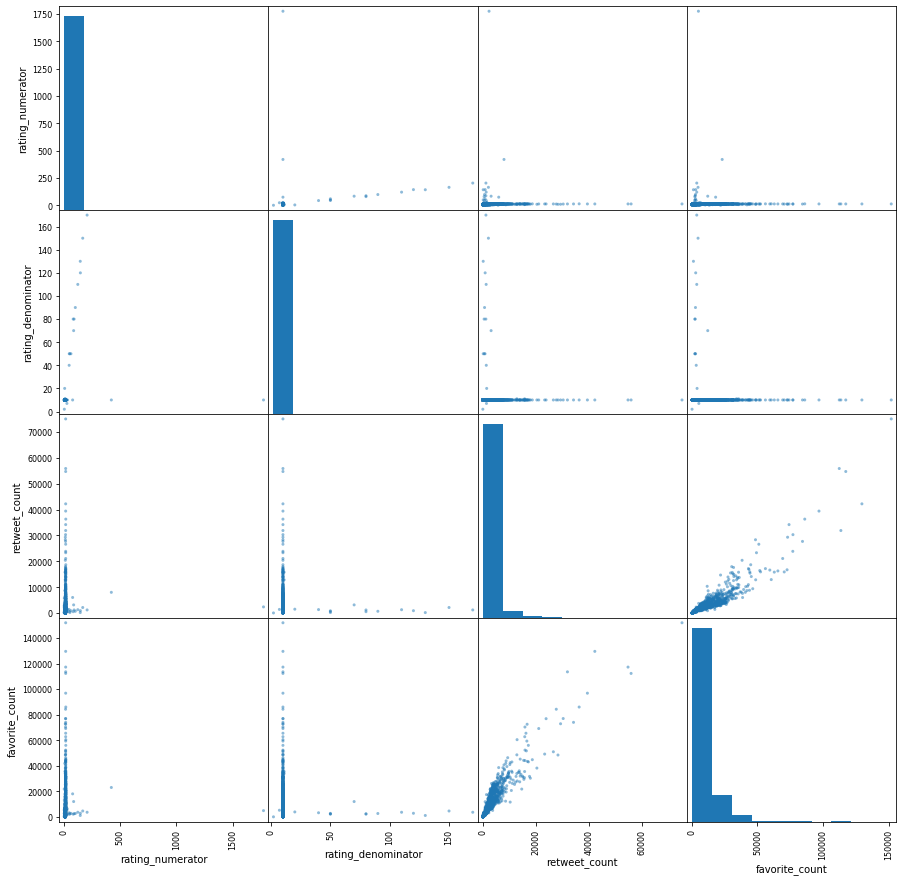

In [121]:
pd.plotting.scatter_matrix(archive.iloc[:, 4:10:], figsize=(15, 15));

# Show
#plt.tight_layout()
plt.savefig('ipynb_files/images/overview.png')
plt.show()

### 5.3.1 Most Popular Dog Types

In [122]:
# Looking for dog_type counts
archive['dog_type'].value_counts()

pupper             203
doggo               62
puppo               22
multiple_stages     11
floofer              7
Name: dog_type, dtype: int64

In [123]:
# Turning count into a dataframe and csv file
dog_count = archive 
dog_count.rename(columns={"favorite_count":"count"},inplace=True)
dog_count = dog_count[['dog_type','count']].groupby(by=['dog_type']).count().sort_values(by='count', ascending=False).round().astype(np.int64)

# Saving to .csv
dog_count.to_csv('ipynb_files/tables/dog_count.csv',index=True)
dog_count

,count
dog_type,
pupper,203
doggo,62
puppo,22
multiple_stages,11
floofer,7


In [124]:
archive.query('dog_type == "pupper"').dog_type.count()

203

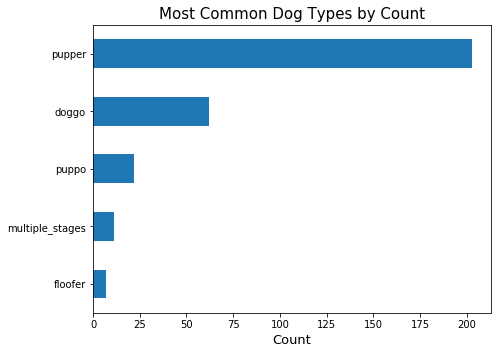

In [125]:
# Set title label
plt.title('Most Common Dog Types by Count', fontsize = 15)

# Set axis labels
plt.ylabel('', fontsize = 13)
plt.xlabel('Count', fontsize = 13)

# Set ticks
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

# Plot
archive.dog_type.value_counts().sort_values().plot(kind = 'barh', figsize=(7, 5))

# Show
plt.tight_layout(1)

plt.savefig('ipynb_files/images/most_common_dog_types_by_count.png')
plt.show()

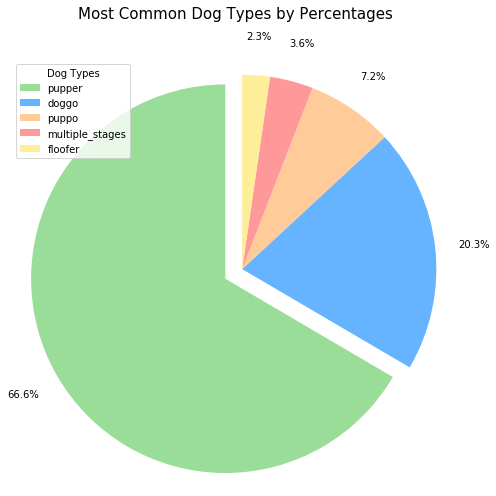

In [126]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(archive.dog_type.value_counts().index)
explode = (0.1, 0, 0, 0, 0)
colors = ['#99dd99', '#66b3ff', '#ffcc99','#ff9999', '#ffee99']
fig1, ax1 = plt.subplots(figsize=(7,7))

# Plot
ax1.pie(archive.dog_type.value_counts(), explode=explode, autopct='%1.1f%%', radius=1,
        shadow=False, startangle=90, colors = colors, pctdistance=1.2) # Percentage label position

# Labels
ax1.legend(labels, title='Dog Types', loc='upper left')

# Title
plt.title('Most Common Dog Types by Percentages\n\n', fontsize=15)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()

# Show
plt.tight_layout()
plt.savefig('ipynb_files/images/most_common_dog_types_by_percentages.png')
plt.show()

### 5.3.2 Most Popular Dog Types by Favourite Counts

In [127]:
archive.iloc[0:1]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7435,35269,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [128]:
# Renaming column back to favorite_count
archive.rename(columns={"count":"favorite_count"},inplace=True) 

# Creating a dataframe for our plot
fav_dogtype = archive[['dog_type','favorite_count']].groupby(by=['dog_type']).mean().sort_values(by='favorite_count', ascending=False).round().astype(np.int64)
fav_dogtype.to_csv('ipynb_files/tables/dog_type_favourite_count.csv',index=True)
fav_dogtype

,favorite_count
dog_type,
puppo,20418
doggo,18399
multiple_stages,15653
floofer,11738
pupper,6493


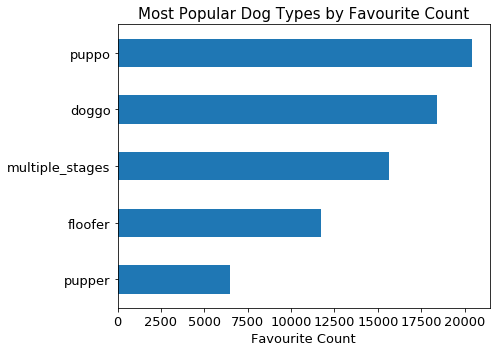

In [129]:
# Plot
fav_dogtype.sort_values(by='favorite_count', ascending=True).plot(kind = 'barh', figsize=(7, 5), legend=None) # Removed legend

# Set title label
plt.title('Most Popular Dog Types by Favourite Count', fontsize = 15)

# Set axis labels
plt.ylabel('', fontsize = 13)
plt.xlabel('Favourite Count', fontsize = 13)

# Set ticks
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

# Show
plt.tight_layout()
plt.savefig('ipynb_files/images/most_popular_dog_types_by_favourite_count.png')
plt.show()

The most popular Dog Type by Favourite Count seems to be `puppo` which has a staggering 19530 compared to the lowest at 6277 for `pupper`.

In [130]:
# Creating a dataframe for our plot
ret_dogtype = archive[['dog_type','retweet_count']].groupby(by=['dog_type']).mean().sort_values(by='retweet_count', ascending=False).round().astype(np.int64)
ret_dogtype.to_csv('ipynb_files/tables/dog_type_retweet_count.csv',index=True)
ret_dogtype

,retweet_count
dog_type,
doggo,6313
puppo,5624
multiple_stages,4786
floofer,4200
pupper,2021


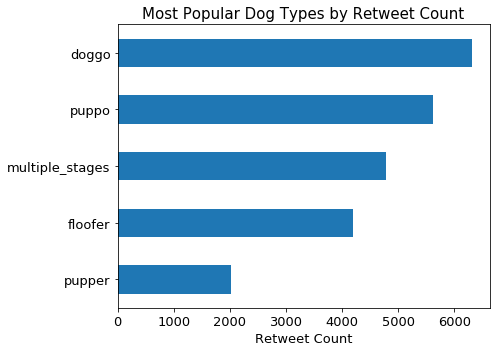

In [131]:
# Plot
ret_dogtype.sort_values(by='retweet_count', ascending=True).plot(kind = 'barh', figsize=(7, 5), legend=None) # Removed legend

# Set title label
plt.title('Most Popular Dog Types by Retweet Count', fontsize = 15)

# Set axis labels
plt.ylabel('', fontsize = 13)
plt.xlabel('Retweet Count', fontsize = 13)

# Set ticks
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

# Show
plt.tight_layout()
plt.savefig('ipynb_files/images/most_popular_dog_types_by_retweet_count.png')
plt.show()

The most popular Dog Type is `doggo` in terms of Retweet Count, followed by `puppo` and `floofer` with `pupper` dead last again. 

In [132]:
# Creating a dataframe for our plot
pop_dogtype = archive[['dog_type','retweet_count', 'favorite_count']].groupby(by=['dog_type']).mean().sort_values(by='retweet_count', ascending=False).round().astype(np.int64)
pop_dogtype['total'] = pop_dogtype['retweet_count'] + pop_dogtype['favorite_count']
pop_dogtype = pop_dogtype.sort_values(by='total', ascending=False)
pop_dogtype

,retweet_count,favorite_count,total
dog_type,,,
puppo,5624,20418,26042
doggo,6313,18399,24712
multiple_stages,4786,15653,20439
floofer,4200,11738,15938
pupper,2021,6493,8514


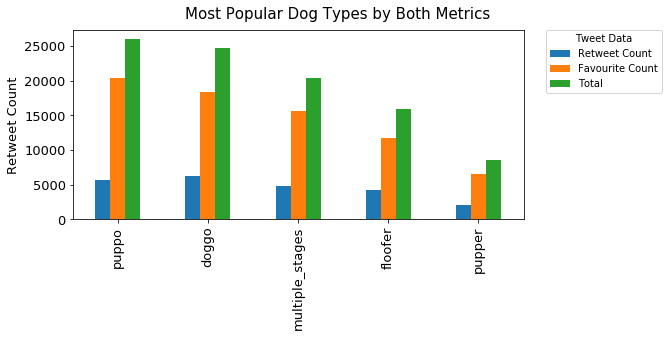

In [133]:
# Labels
pop_dogtype_labels = ['Retweet Count','Favourite Count','Total']

# Plot
pop_dogtype.plot(kind = 'bar', figsize=(10, 5)) # Inserted figsize into plot due to random sizing behaviour

# Set title label
plt.suptitle('Most Popular Dog Types by Both Metrics', fontsize = 15)

# Set axis labels
plt.ylabel('Retweet Count', fontsize = 13)
plt.xlabel('', fontsize = 13)

# Set ticks
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

# Legend
plt.legend(pop_dogtype_labels, title='Tweet Data',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Show
plt.tight_layout(pad=3)
plt.savefig('ipynb_files/images/most_popular_dog_types_by_both_metrics.png')
plt.show()

In [134]:
# Variable reused to create table. Notice: code can add 'ratio' variable from below into chart above if run backwards
pop_dogtype['entries'] = archive.dog_type.value_counts()
pop_dogtype

,retweet_count,favorite_count,total,entries
dog_type,,,,
puppo,5624,20418,26042,22
doggo,6313,18399,24712,62
multiple_stages,4786,15653,20439,11
floofer,4200,11738,15938,7
pupper,2021,6493,8514,203


In [135]:
# Adding a ratio column
pop_dogtype['ratio'] = (pop_dogtype['total'] / pop_dogtype['entries']).astype(np.int64)
pop_dogtype_ratio = pop_dogtype.sort_values(by='ratio', ascending=False)

# Saving as a .csv
pop_dogtype_ratio.to_csv('ipynb_files/tables/both_metrics_table.csv',index=True)
pop_dogtype_ratio

,retweet_count,favorite_count,total,entries,ratio
dog_type,,,,,
floofer,4200,11738,15938,7,2276
multiple_stages,4786,15653,20439,11,1858
puppo,5624,20418,26042,22,1183
doggo,6313,18399,24712,62,398
pupper,2021,6493,8514,203,41


We can conclude the most common dog type `pupper` is the least popular again unsurprisingly but the most popular is `puppo` with the second fewest entries at just 22. `Floofer` has the strongest ratio of entries to popularity at 2276%, gaining 15,938 total retweets and favourite counts from just 7 entries.

### 5.3.3 Followers vs Date

In [136]:
# Creating a dataframe filter to plot
follower_time = archive[['timestamp', 'followers_count']]

# Printing the tail for the dataset we just created
print(follower_time.head())

                  timestamp  followers_count
0 2017-08-01 16:23:56+00:00          8940931
1 2017-08-01 00:17:27+00:00          8940931
2 2017-07-31 00:18:03+00:00          8940931
3 2017-07-30 15:58:51+00:00          8940931
4 2017-07-29 16:00:24+00:00          8940931


In [137]:
follower_time.head().set_index('timestamp')

,followers_count
timestamp,
2017-08-01 16:23:56+00:00,8940931
2017-08-01 00:17:27+00:00,8940931
2017-07-31 00:18:03+00:00,8940931
2017-07-30 15:58:51+00:00,8940931
2017-07-29 16:00:24+00:00,8940931


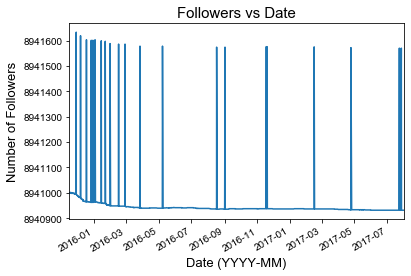

In [138]:
# Plot
archive[['timestamp', 'followers_count']].set_index('timestamp').plot(legend=False)

# Set axis labels
plt.xlabel('Date (YYYY-MM)', fontsize = 13)
plt.ylabel('Number of Followers', fontsize = 13)
plt.title("Followers vs Date", fontsize = 15)

# Graph size
sns.set(rc={'figure.figsize':(7,5)})

# Setting the stylesheet
sns.set_style("white")

We have some strange outliers we missed earlier so we can remove them by either using `.clip` or `np.percentile` to remove values above a certain percentile.

In [139]:
# Saving as a .csv
follower_time.describe().to_csv('ipynb_files/tables/follower_time_table.csv',index=True)

# Finding the statistical data for the dataset to look for outliers
follower_time.describe()

,followers_count
count,1.986000e+03
mean,8.940962e+06
std,6.865258e+01
min,8.940931e+06
25%,8.940937e+06
50%,8.940943e+06
75%,8.940973e+06
max,8.941633e+06


In [140]:
# 75th percentile of follower_time.followers_count
follower_time_pct = np.percentile(follower_time.followers_count, 99)
follower_time_pct

8941570.0

In [141]:
follower_time_master = follower_time[follower_time['followers_count'] > follower_time_pct].set_index('timestamp')

In [142]:
follower_time_master.head()

,followers_count
timestamp,
2017-04-24 16:22:16+00:00,8941572
2017-02-15 01:04:21+00:00,8941575
2016-11-18 23:35:32+00:00,8941576
2016-11-17 17:04:16+00:00,8941576
2016-09-01 16:14:48+00:00,8941574


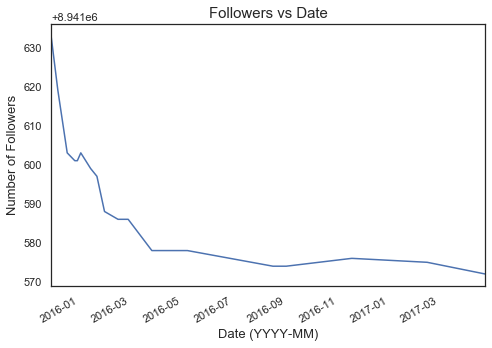

In [143]:
# Plot
follower_time_master.plot(legend=False)

# Set axis labels
plt.xlabel('Date (YYYY-MM)', fontsize = 13)
plt.ylabel('Number of Followers', fontsize = 13)
plt.title("Followers vs Date", fontsize = 15)

# Graph size
sns.set(rc={'figure.figsize':(7,5)})

# Setting the stylesheet
sns.set_style("white")

# Show
plt.tight_layout()
plt.savefig('ipynb_files/images/followers_v_date.png')
plt.show()

### 5.3.4 Retweets vs Date

In [144]:
# Creating a dataframe filter to plot
retweet_time = archive[['timestamp', 'retweet_count']]

# Printing the tail for the dataset we just created
print(retweet_time.head())

                  timestamp  retweet_count
0 2017-08-01 16:23:56+00:00           7435
1 2017-08-01 00:17:27+00:00           5527
2 2017-07-31 00:18:03+00:00           3649
3 2017-07-30 15:58:51+00:00           7615
4 2017-07-29 16:00:24+00:00           8195


In [145]:
# Finding the statistical data for the dataset to look for outliers
retweet_time.describe()

,retweet_count
count,1986.000000
mean,2372.226083
std,4246.695279
min,11.000000
25%,529.250000
50%,1145.500000
75%,2701.750000
max,75048.000000


In [146]:
retweet_time.head().set_index('timestamp')

,retweet_count
timestamp,
2017-08-01 16:23:56+00:00,7435
2017-08-01 00:17:27+00:00,5527
2017-07-31 00:18:03+00:00,3649
2017-07-30 15:58:51+00:00,7615
2017-07-29 16:00:24+00:00,8195


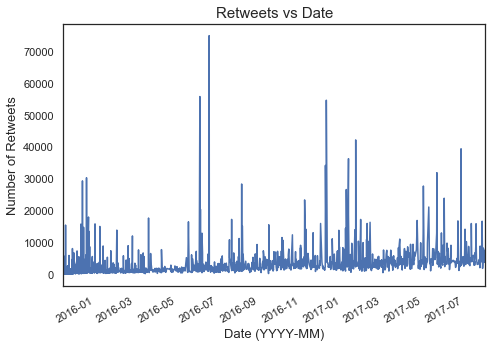

In [147]:
# Plot
archive[['timestamp', 'retweet_count']].set_index('timestamp').plot(legend=False)

# Set axis labels
plt.xlabel('Date (YYYY-MM)', fontsize = 13)
plt.ylabel('Number of Retweets', fontsize = 13)
plt.title("Retweets vs Date", fontsize = 15)

# Graph size
sns.set(rc={'figure.figsize':(7,5)})

# Setting the stylesheet
sns.set_style("white")

# Figure size
#plt.figure(figsize=(7, 5))

# Show
plt.tight_layout()
plt.savefig('ipynb_files/images/retweets_v_date.png')
plt.show()

We can get further insight by looking at retweets by month. Since we have a 1.5 year sample we should take January to December 2016. If we try to sample every month we can see that some months only occur once such as September and October which will skew the results.

### 5.3.5 Retweets vs Month

In [148]:
retweet_time.dtypes

timestamp        datetime64[ns, UTC]
retweet_count                  int64
dtype: object

In [149]:
# Grouping the retweet data into months
retweet_month = retweet_time.groupby(pd.Grouper(key='timestamp', freq='1M')).sum() # groupby each 1 month
retweet_month.index = retweet_month.index.strftime('%B')

# Filtering only January to December 2016
retweet_month = retweet_month[2:14]
retweet_month.to_csv('ipynb_files/tables/retweet_month.csv',index=True)
retweet_month

,retweet_count
January,218206
February,152670
March,167290
April,74331
May,106893
June,303113
July,186798
August,183950
September,192606
October,235565


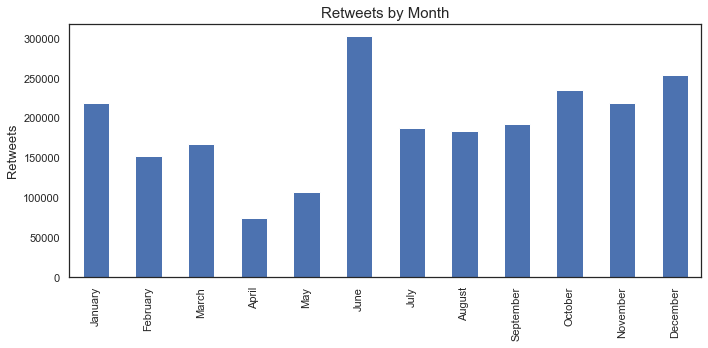

In [150]:
# Variable to reverse the order of month for barh plot option
retweet_month_r = retweet_month.iloc[::-1]

# Plot
retweet_month.plot(kind='bar', figsize=(10, 5), legend=False) #.sort_values(by=, axis=0, ascending=True)

# Set title label
plt.title('Retweets by Month', fontsize = 15)

# Set axis labels
plt.ylabel('Retweets', fontsize = 13)
plt.xlabel('')

# Show
plt.tight_layout()
plt.savefig('ipynb_files/images/retweets_v_month.png')
plt.show()

In [151]:
# Sorting the months by highest to lowest retweets
retweet_month.sort_values('retweet_count', ascending=False)

,retweet_count
June,303113
December,254200
October,235565
November,218451
January,218206
September,192606
July,186798
August,183950
March,167290
February,152670


### 5.3.6 Retweets v Time of Day

**Key:** **Morning:** 06:00-12:00, **Afternoon:** 12:00-18:00, **Evening:** 18:00-00:00 **Overnight:** 00:00-06:00

In [152]:
# Defining the dataframe as new variable
df_timeofday = archive

# Converting the 'timestamp' column as a datetime object
df_timeofday['timestamp'] = pd.to_datetime(df_timeofday['timestamp']) 

# Creating a new datetime columns 'hour' and 'minute'
df_timeofday['hour'] = df_timeofday.timestamp.dt.hour
df_timeofday['minute'] = df_timeofday.timestamp.dt.minute 

# Splitting the timestamp into hour and minutes by using hour *60 + minute
df_timeofday['time_in_min'] = df_timeofday['hour']*60 + df_timeofday['minute']

# There are 24 hrs in a day, so we can split these hours into 4 sections
bin_edges = [0, 6*60, 12*60, 18*60, 24*60]
bin_labels = ['Overnight', 'Morning', 'Afternoon', 'Evening']
df_timeofday['time_of_day'] = pd.cut(df_timeofday['time_in_min'], bin_edges, labels=bin_labels)

# Looking at our new dataframe
df_timeofday.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,hour,minute,time_in_min,time_of_day
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7435,35269,...,bagel,0.085851,False,banana,0.076110,False,16,23,983,Afternoon
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5527,30524,...,Pekinese,0.090647,True,papillon,0.068957,True,0,17,17,Overnight
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3649,22951,...,malamute,0.078253,True,kelpie,0.031379,True,0,18,18,Overnight
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7615,38555,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,15,58,958,Afternoon
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8195,36841,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,16,0,960,Afternoon


In [153]:
# Grouping the data by time of day
df_timeofday = df_timeofday.groupby(by=["time_of_day"]).sum()

In [154]:
# Reordering the index to put overnight at the bottom
df_timeofday = df_timeofday.loc[['Morning', 'Afternoon', 'Evening','Overnight'], :]
df_timeofday

,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,hour,minute,time_in_min
time_of_day,,,,,,,,,,,,,,
Morning,36,30,56899,123760,26822908,1.835128,3.0,0.457876,3.0,0.176931,3.0,18,35,1115
Afternoon,7119,4813,1243851,4664637,4086015128,279.387663,345.0,63.531465,365.0,26.286711,348.0,7371,12424,454684
Evening,5398,5007,1299954,4032530,4443655941,291.882293,370.0,64.924739,368.0,30.210448,352.0,10203,14521,626701
Overnight,11741,10991,2080926,7067745,9128728494,599.965933,745.0,136.414295,745.0,62.725609,728.0,1720,28609,131809


In [155]:
df_timeofday[['retweet_count']].iloc[::-1].to_csv('ipynb_files/tables/retweets_v_time_of_day_table.csv',index=True)
df_timeofday[['retweet_count']].iloc[::-1]

,retweet_count
time_of_day,
Overnight,2080926
Evening,1299954
Afternoon,1243851
Morning,56899


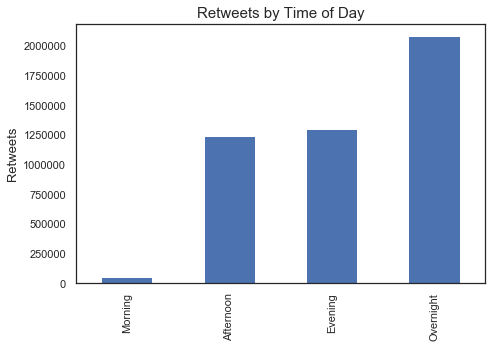

In [156]:
# Variable to reverse the order of month for barh plot option
retweet_month_r = retweet_month.iloc[::-1]

# Figure size
plt.figure(figsize=(7, 5))

# Plot
df_timeofday['retweet_count'].plot(kind='bar', legend=False) #.sort_values(by=, axis=0, ascending=True)

# Set title label
plt.title('Retweets by Time of Day', fontsize = 15)

# Set axis labels
plt.ylabel('Retweets', fontsize = 13)
plt.xlabel('', fontsize = 13)

# Show
plt.tight_layout()
plt.savefig('ipynb_files/images/retweets_v_time_of_day.png')
plt.show()

The most retweets come `overnight` which is interesting but can be explained by the fact that the users could be active in other timezones around the globe. It might be between midnight and 06:00 for `WeRateDogs` but it could be daytime in the countries its followers retweeted from, this data isn't as useful since we don't have the data on individual countries. 

### 5.3.7 Most Popular Dog Names

In [157]:
# Most Popular Dog Names
pop_names = archive['name'].value_counts().iloc[:10]
archive['name'].value_counts().iloc[:10]

Oliver     10
Cooper     10
Charlie    10
Penny       9
Lucy        9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Lola        7
Name: name, dtype: int64

In [158]:
# Turning count into a dataframe and csv file
archive['name'].value_counts().iloc[:10].to_csv('ipynb_files/tables/pop_names_count.csv',index=True, header=True)

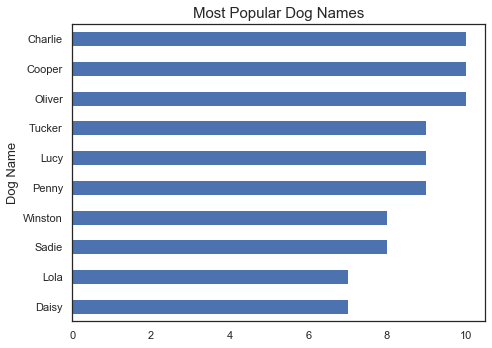

In [159]:
# Figure size
plt.figure(figsize=(7, 5))

# Set title label
plt.title('Most Popular Dog Names', fontsize = 15)

# Set axis labels
plt.ylabel('Dog Name', fontsize = 13)
plt.xlabel('', fontsize = 13)

# Plot
pop_names.sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.savefig('ipynb_files/images/most_popular_dog_names.png')
plt.show()

From our findings, we can see the most popular dog names are Tucker, Oliver, Cooper, Charlie, Penny each with 10 counts. 4 of the 5 top names seem to be male which is also an interesting observation, but there are female names such as Penny, Lucy and Lola with strong results.

### 5.4 Favourites vs Retweets

We can look at the correlation between favourites and retweets then favourites vs followers below.

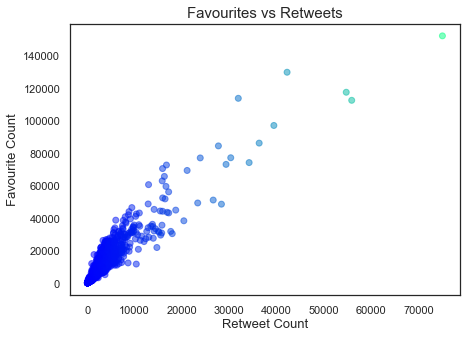

In [160]:
# Figure size
plt.figure(figsize=(7, 5))

# Create data
x = archive['retweet_count']
y = archive['favorite_count']

# Plot
plt.scatter(x, y, cmap = 'winter', c=archive['retweet_count'], alpha=0.5)
plt.title('Favourites vs Retweets', fontsize = 15)
plt.xlabel('Retweet Count', fontsize = 13)
plt.ylabel('Favourite Count', fontsize = 13)
plt.savefig('ipynb_files/images/favourites_vs_retweets_scatter.png', bbox_inches=None)
plt.show()

Favourite and retweet counts seem to have a nearly 1:1 correlation which shows a strong possibility users favourite and retweet posts they see at the same time. Users are also highly unlikey to perform either action seperately.

### 5.4.1 Favourites vs Followers

In [161]:
# Grouping retweets by week
retweets_per_week = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
                 .reset_index().sort_values('timestamp')[:-1]

# Grouping favourites by week
favourites_per_week = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum()\
                 .reset_index().sort_values('timestamp')[:-1]

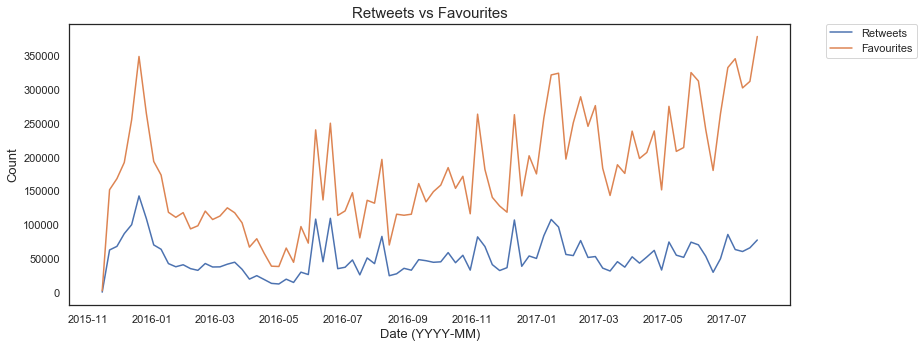

In [162]:
# Graph size
sns.set(rc={'figure.figsize':(13,5)})

# Setting the stylesheet
sns.set_style("white")

# Plot
plt.plot(retweets_per_week['timestamp'], retweets_per_week['retweet_count'], label="Retweets")
plt.plot(favourites_per_week['timestamp'], favourites_per_week['favorite_count'], label="Favourites")

# Set axis labels
plt.xlabel('Date (YYYY-MM)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title("Retweets vs Favourites", fontsize = 15)

# Legend
lpw = ['Retweets', 'Favourites']
plt.legend(lpw,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Save png
plt.tight_layout()
plt.savefig('ipynb_files/images/favourites_vs_followers.png', bbox_inches=None)

Here, we can see favourites comfortably outperforming retweets. However, the trend of retweets and favourites increasing and decreasing over time remains constant. This indicates users probably retweet then like the tweets they see but are more likely to favourite than retweet. 

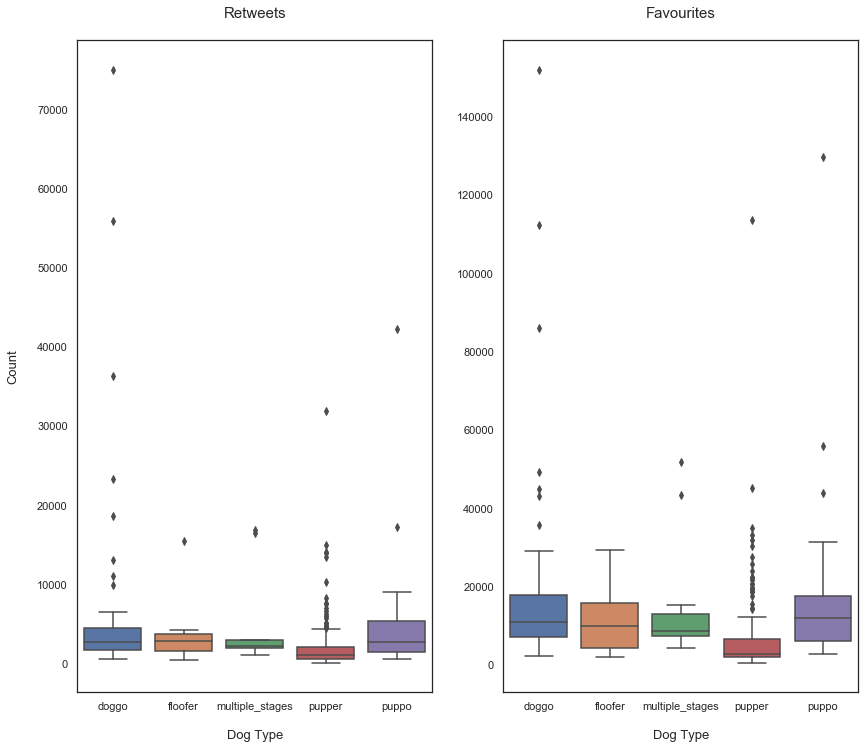

In [163]:
# Setting figsize
plt.subplots(figsize=(14, 12))

# Plotting Retweets Boxplot
plt.subplot(121) # Rows, Columns, Index
sns.boxplot(x=archive.dog_type, y=archive.retweet_count, fliersize=5, linewidth=1.5)
plt.title('Retweets\n', fontsize=15)
plt.xlabel('\nDog Type', fontsize = 13)
plt.ylabel('Count\n', fontsize = 13)

# Plotting Favourites Boxplot
plt.subplot(122)
sns.boxplot(x=archive.dog_type, y=archive.favorite_count, fliersize=5, linewidth=1.5)
plt.title('Favourites\n', fontsize=15)
plt.xlabel('\nDog Type', fontsize = 13)
plt.ylabel('')

plt.savefig('ipynb_files/images/boxplot.png')

From our boxplot we can see that `puppo` has the most variance but also the highest number of retweets but `doggo` has the widest outliers. For favourites we can see the pattern remains the same except `doggo` beats `puppo` in favourite counts with `Floofer` also performing strongly. In both plots we can see pupper has a very tight grouping which indicates consistency in terms of retweets and favourites. 

<a id='machinelearning'></a>
## Step 6: Machine Learning Model

In [164]:
archive.iloc[0:5]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,hour,minute,time_in_min,time_of_day
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7435,35269,...,bagel,0.085851,False,banana,0.076110,False,16,23,983,Afternoon
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5527,30524,...,Pekinese,0.090647,True,papillon,0.068957,True,0,17,17,Overnight
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3649,22951,...,malamute,0.078253,True,kelpie,0.031379,True,0,18,18,Overnight
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7615,38555,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,15,58,958,Afternoon
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8195,36841,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,16,0,960,Afternoon


In [165]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 26 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns, UTC]
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1342 non-null object
dog_type              305 non-null category
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
followers_count       1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null category
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               19

In [166]:
archive[['p1_conf', 'p2_conf', 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,1986.000000,1.986000e+03,1.986000e+03
mean,0.593135,1.345271e-01,6.039933e-02
std,0.271907,1.005666e-01,5.091274e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.360998,5.415523e-02,1.628435e-02
50%,0.587222,1.175370e-01,4.959335e-02
75%,0.843883,1.951377e-01,9.186877e-02
max,1.000000,4.880140e-01,2.734190e-01


In [167]:
archive = archive.drop(['hour','minute','time_in_min'], axis='columns')

In [168]:
archive.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type', 'retweet_count',
       'favorite_count', 'followers_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'time_of_day'],
      dtype='object')

In [169]:
ml_predictions_dog = archive.copy().drop(['tweet_id', 'jpg_url', 'img_num', 'rating_numerator', 'rating_denominator', 'favorite_count', 'followers_count', 'retweet_count'], axis='columns')

In [170]:
ml_predictions_dog[['d1_false','d1_true']] = pd.get_dummies(ml_predictions['p1_dog']).astype(int)
ml_predictions_dog[['d2_false','d2_true']] = pd.get_dummies(ml_predictions['p2_dog']).astype(int)
ml_predictions_dog[['d3_false','d3_true']] = pd.get_dummies(ml_predictions['p3_dog']).astype(int)

In [171]:
# Machine learning dataset
ml_predictions_dog.head(1)

,timestamp,text,expanded_urls,name,dog_type,p1,p1_conf,p1_dog,p2,p2_conf,...,p3,p3_conf,p3_dog,time_of_day,d1_false,d1_true,d2_false,d2_true,d3_false,d3_true
0,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,orange,0.097049,False,bagel,0.085851,...,banana,0.07611,False,Afternoon,0.0,1.0,0.0,1.0,0.0,1.0


In [172]:
ml_predictions_dog['d1_true'].astype(str).value_counts()

1.0    1442
0.0     529
nan      15
Name: d1_true, dtype: int64

In [173]:
ml_predictions_dog['d2_true'].astype(str).value_counts()

1.0    1464
0.0     507
nan      15
Name: d2_true, dtype: int64

In [174]:
ml_predictions_dog['d3_true'].astype(str).value_counts()

1.0    1417
0.0     554
nan      15
Name: d3_true, dtype: int64

In [175]:
ml_predictions_dog.loc[ml_predictions_dog.d1_true.isnull()]

,timestamp,text,expanded_urls,name,dog_type,p1,p1_conf,p1_dog,p2,p2_conf,...,p3,p3_conf,p3_dog,time_of_day,d1_false,d1_true,d2_false,d2_true,d3_false,d3_true
607,2016-08-20 22:12:29+00:00,This is Rupert. You betrayed him with bath tim...,https://twitter.com/dog_rates/status/767122157...,Rupert,NaN,toy_poodle,0.873841,True,miniature_poodle,0.059192,...,Irish_terrier,0.035306,True,Evening,NaN,NaN,NaN,NaN,NaN,NaN
1309,2016-01-03 20:12:10+00:00,Meet Sebastian. He's a womanizer. Romantic af....,https://twitter.com/dog_rates/status/683742671...,Sebastian,NaN,Pembroke,0.895279,True,Cardigan,0.022385,...,cocker_spaniel,0.017045,True,Evening,NaN,NaN,NaN,NaN,NaN,NaN
1349,2015-12-28 02:15:26+00:00,This is actually a lion. We only rate dogs. Fo...,https://twitter.com/dog_rates/status/681297372...,NaN,NaN,Lhasa,0.482401,True,Shih-Tzu,0.113672,...,Pomeranian,0.096229,True,Overnight,NaN,NaN,NaN,NaN,NaN,NaN
1413,2015-12-20 05:25:42+00:00,Touching scene here. Really stirs up the emoti...,https://twitter.com/dog_rates/status/678446151...,NaN,NaN,Staffordshire_bullterrier,0.284492,True,Rottweiler,0.189434,...,American_Staffordshire_terrier,0.189430,True,Overnight,NaN,NaN,NaN,NaN,NaN,NaN
1470,2015-12-14 16:34:00+00:00,Hope your Monday isn't too awful. Here's two b...,https://twitter.com/dog_rates/status/676440007...,NaN,NaN,Maltese_dog,0.579472,True,toy_poodle,0.133446,...,Shih-Tzu,0.094397,True,Afternoon,NaN,NaN,NaN,NaN,NaN,NaN
1615,2015-12-05 03:41:37+00:00,Very happy pup here. Always smiling. Loves his...,https://twitter.com/dog_rates/status/672984142...,NaN,NaN,wombat,0.738780,False,beaver,0.133368,...,wallaby,0.032370,False,Overnight,NaN,NaN,NaN,NaN,NaN,NaN
1676,2015-12-01 04:22:29+00:00,Interesting dog here. Very large. Purple. Mani...,https://twitter.com/dog_rates/status/671544874...,NaN,NaN,feather_boa,0.240858,False,wig,0.085946,...,wool,0.040674,False,Overnight,NaN,NaN,NaN,NaN,NaN,NaN
1785,2015-11-26 01:07:38+00:00,This is Kloey. Her mother was a unicorn.,https://twitter.com/dog_rates/status/669683899...,Kloey,NaN,Pomeranian,0.998275,True,Chihuahua,0.000605,...,Pekinese,0.000516,True,Overnight,NaN,NaN,NaN,NaN,NaN,NaN
1835,2015-11-23 04:21:26+00:00,Incredibly rare dog here. Good at bipedalism. ...,https://twitter.com/dog_rates/status/668645506...,NaN,NaN,ski_mask,0.302854,False,knee_pad,0.096881,...,balance_beam,0.084076,False,Overnight,NaN,NaN,NaN,NaN,NaN,NaN
1837,2015-11-23 04:03:57+00:00,Meet Hanz. He heard some thunder.,https://twitter.com/dog_rates/status/668641109...,Hanz,NaN,vacuum,0.432594,False,pug,0.146311,...,toilet_tissue,0.024500,False,Overnight,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
ml_predictions_dog = ml_predictions_dog[ml_predictions_dog['d1_true'].notna()]

In [177]:
ml_predictions_dog['d1_true'].astype(str).value_counts()

1.0    1442
0.0     529
Name: d1_true, dtype: int64

In [178]:
ml_predictions_dog['d1_true'].isnull().value_counts()

False    1971
Name: d1_true, dtype: int64

In [179]:
print(ml_predictions_dog['d1_true'].mean())
print(ml_predictions_dog['d2_true'].mean())
print(ml_predictions_dog['d3_true'].mean())

0.7316083206494165
0.7427701674277016
0.7189244038559107


In [180]:
print(ml_predictions_dog.groupby('d1_true').mean()['p1_conf'])
print(ml_predictions_dog.groupby('d2_true').mean()['p2_conf'])
print(ml_predictions_dog.groupby('d3_true').mean()['p3_conf'])

d1_true
0.0    0.613405
1.0    0.585390
Name: p1_conf, dtype: float64
d2_true
0.0    0.126519
1.0    0.137551
Name: p2_conf, dtype: float64
d3_true
0.0    0.058026
1.0    0.061283
Name: p3_conf, dtype: float64


In [181]:
ml_predictions_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1984
Data columns (total 21 columns):
timestamp        1971 non-null datetime64[ns, UTC]
text             1971 non-null object
expanded_urls    1971 non-null object
name             1338 non-null object
dog_type         305 non-null category
p1               1971 non-null object
p1_conf          1971 non-null float64
p1_dog           1971 non-null bool
p2               1971 non-null object
p2_conf          1971 non-null float64
p2_dog           1971 non-null bool
p3               1971 non-null object
p3_conf          1971 non-null float64
p3_dog           1971 non-null bool
time_of_day      1963 non-null category
d1_false         1971 non-null float64
d1_true          1971 non-null float64
d2_false         1971 non-null float64
d2_true          1971 non-null float64
d3_false         1971 non-null float64
d3_true          1971 non-null float64
dtypes: bool(3), category(2), datetime64[ns, UTC](1), float64(9), object(6)


In [182]:
# Checking our correlation
ml_predictions_dog.corr()

,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,d1_false,d1_true,d2_false,d2_true,d3_false,d3_true
p1_conf,1.000000,0.125506,-0.508589,0.141222,-0.708669,0.117302,0.045652,-0.045652,0.055804,-0.055804,0.043094,-0.043094
p1_dog,0.125506,1.000000,0.111104,0.635128,0.048553,0.555590,-0.008157,0.008157,0.003147,-0.003147,0.024092,-0.024092
p2_conf,-0.508589,0.111104,1.000000,0.098791,0.479664,0.066325,-0.041318,0.041318,-0.047897,0.047897,-0.026544,0.026544
p2_dog,0.141222,0.635128,0.098791,1.000000,0.036965,0.550452,0.008769,-0.008769,-0.003178,0.003178,0.009304,-0.009304
p3_conf,-0.708669,0.048553,0.479664,0.036965,1.000000,0.035380,-0.037506,0.037506,-0.039833,0.039833,-0.028860,0.028860
p3_dog,0.117302,0.555590,0.066325,0.550452,0.035380,1.000000,0.003079,-0.003079,0.000420,-0.000420,0.010273,-0.010273
d1_false,0.045652,-0.008157,-0.041318,0.008769,-0.037506,0.003079,1.000000,-1.000000,0.633699,-0.633699,0.558595,-0.558595
d1_true,-0.045652,0.008157,0.041318,-0.008769,0.037506,-0.003079,-1.000000,1.000000,-0.633699,0.633699,-0.558595,0.558595
d2_false,0.055804,0.003147,-0.047897,-0.003178,-0.039833,0.000420,0.633699,-0.633699,1.000000,-1.000000,0.553846,-0.553846
d2_true,-0.055804,-0.003147,0.047897,0.003178,0.039833,-0.000420,-0.633699,0.633699,-1.000000,1.000000,-0.553846,0.553846


In [183]:
# Importing library for machine learning
import statsmodels.api as sm

# Creating the intercept
ml_predictions_dog['intercept'] = 1

# Creating our model
log_mod = sm.Logit(ml_predictions_dog['d1_true'], ml_predictions_dog[['intercept', 'd2_true', 'd3_true', 'p1_conf', 'p2_conf', 'p3_conf']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.352535
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                d1_true   No. Observations:                 1971
Model:                          Logit   Df Residuals:                     1965
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:                  0.3939
Time:                        01:08:05   Log-Likelihood:                -694.85
converged:                       True   LL-Null:                       -1146.4
Covariance Type:            nonrobust   LLR p-value:                5.450e-193
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9442      0.377     -5.151      0.000      -2.684      -1.205
d2_true        2.5303      0.145     17.414      0.000       2.245       2.815
d3_true        1.8340      0.144     12.751      0.000       1.552       2.116
p1_conf        0.1117      0.384      0.291      0.771      -0.640       0.864
p2_conf        0.3786      0.832      0.455      0.649      -1.252       2.009
p3_conf        0.9201      2.041      0.451      0.652      -3.080       4.920
==============================================================================
"""

In [184]:
np.exp(results.params)

intercept     0.143096
d2_true      12.557029
d3_true       6.258607
p1_conf       1.118135
p2_conf       1.460258
p3_conf       2.509624
dtype: float64

In [185]:
1/_

intercept    6.988319
d2_true      0.079637
d3_true      0.159780
p1_conf      0.894346
p2_conf      0.684810
p3_conf      0.398466
dtype: float64

In [186]:
ml_predictions_dog.groupby('d1_true').mean()['p1_conf']

d1_true
0.0    0.613405
1.0    0.585390
Name: p1_conf, dtype: float64

### 6.1. Model Diagnostics

We can use our dummy variable columns for our model diagnostics. First, we need to divide our data into training and test data. We will create our test set as 20% of the data, and use a random state of 0. Our response should be the d1_true column.

In [187]:
# Importing libraries for model diagnostics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

#### Instantiate

In [188]:
ml_predictions_dog.columns

Index(['timestamp', 'text', 'expanded_urls', 'name', 'dog_type', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'time_of_day', 'd1_false', 'd1_true', 'd2_false', 'd2_true',
       'd3_false', 'd3_true', 'intercept'],
      dtype='object')

In [189]:
X = ml_predictions_dog.drop(['timestamp', 'text', 'expanded_urls', 'name', 'dog_type', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'time_of_day'] , axis=1)
y = ml_predictions_dog['d1_true']
X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.20, random_state=0)

#### Fit

Below, we will use a confusion matrix to fit the test data to help assess our predictions.

In [190]:
log_mod = LogisticRegression(solver='lbfgs')
log_mod.fit(X_train, y_train)
preds = log_mod.predict(X_test)
confusion_matrix(y_test, preds)

array([[108,   0],
       [  0, 287]], dtype=int64)

We see 108 true positives and 287 true negatives but 0 false positives and 0 false negatives which means the model prediction is likely to be accurate.

#### Prediction

In [191]:
precision_score(y_test, preds)

1.0

In [192]:
recall_score(y_test, preds)

1.0

In [193]:
accuracy_score(y_test, preds)

1.0

From out predictions, each score is above 100% which is promising.

#### Score

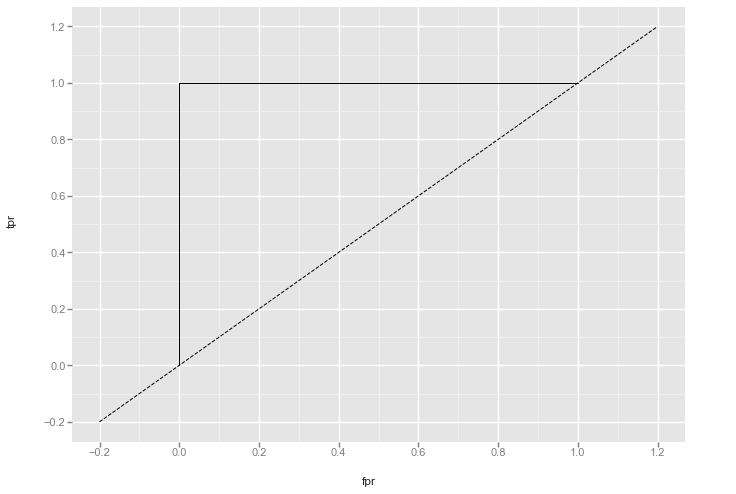

<ggplot: (153054758064)>

In [194]:
from ggplot import *
from sklearn.metrics import roc_curve, auc
%matplotlib inline

preds = log_mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

The AUC – ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve, and AUC represents the degree or measure of separability. It tells us how much model is capable of distinguishing between classes. 

The higher the AUC, better the model is at predicting 0's as 0's and 1's as 1's. Basically, a higher AUC means the model is  better at predicting dog 2 and 3 predictions being true if d1_true equals true.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

### References:
Images in python: https://www.tutorialspoint.com/working-with-images-in-python \
Adding commas to an integer: https://stackoverflow.com/questions/3909457/whats-the-easiest-way-to-add-commas-to-an-integer \
Filtering out uppercase strings: https://stackoverflow.com/questions/15886340/how-to-extract-all-upper-from-a-string-python \
Count NaN values: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe \
Open .tsv file: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783551668/1/ch01lvl1sec10/reading-and-writing-csv-tsv-files-with-python \
Pandas isnull() and notnull(): https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/ \
How to check if column exists: https://www.pythonprogramming.in/how-to-check-if-a-column-exists-in-pandas.html \
https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan \
Advanced Value Counts: https://appdividend.com/2019/01/24/pandas-series-value_counts-tutorial-with-example/ \
Convert integer to string: https://www.datasciencemadesimple.com/convert-numeric-column-character-pandas-python-integer-string/ \
Select last n columns: https://stackoverflow.com/questions/33042633/selecting-last-n-columns-and-excluding-last-n-columns-in-dataframe \
Wide to Long: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html \
any() and all() for Python: https://stackabuse.com/any-and-all-in-python-with-examples/ \
Removing urls: https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python \
Python RegEx aka re library: https://www.guru99.com/python-regular-expressions-complete-tutorial.html \
W3 Schools RegEx: https://www.w3schools.com/python/python_regex.asp \
Filtering rows and columns: https://medium.com/python-in-plain-english/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c \
Bar Plot: https://stackoverflow.com/questions/49059956/pandas-plot-value-counts-barplot-in-descending-manner \
Pyplot: https://matplotlib.org/tutorials/introductory/pyplot.html \
Pie Chart: https://www.tutorialgateway.org/python-matplotlib-pie-chart/ \
Filter rows by values: https://stackoverflow.com/questions/34243194/filter-rows-of-pandas-dataframe-whose-values-are-lower-than-0 \
Working out percentiles: https://www.geeksforgeeks.org/numpy-percentile-in-python/ \
Fix Legend showing one letter: https://stackoverflow.com/questions/44632571/pyplot-legend-only-displaying-one-letter \
Group by month: https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas \
Remove Legend: https://stackoverflow.com/questions/20865487/pandas-plot-without-a-legend \
Reverse Dataframe: https://www.datasciencemadesimple.com/reverse-the-rows-of-the-dataframe-in-pandas-python-2/ \
Reorder Index: https://stackoverflow.com/questions/47841373/how-do-i-rearrange-reorder-not-necessarily-sort-a-pandas-dataframe-index \
Sort Pandas: https://datatofish.com/sort-pandas-dataframe/ \
Adding columns with calculations: https://thispointer.com/pandas-add-two-columns-into-a-new-column-in-dataframe/ \
Drop columns: https://thispointer.com/python-pandas-drop-columns-in-dataframe-by-label-names-or-by-index-positions/ \
Fix ggplot errors: https://github.com/yhat/ggpy/issues/662 \
Hide code: https://github.com/kirbs-/hide_code \
AUC - ROC curve: https://www.mygreatlearning.com/blog/roc-curve/ \
Tight Layout: https://matplotlib.org/tutorials/intermediate/tight_layout_guide.html \
Savefig: https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.savefig.html \
Remove notna: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan